# KONTURLAR VE SEGMENTASYON

Piksel değerleri görününün içeriği hakkında istatiksel bilgiler verebilmektedir aynı zamanda görüntünün iyi özellikleri olarak bilinirler.
Değerler, görüntü içeriğine göre birlikte gruplanır; karanlıktan aydınlığa geçişler sınırları oluşturur ve kenarlar-sınırlar (borders) sahneleri farklı nesnelere böler.

*Sınırlar birbirine bağlanır ve konturları ortaya çıkarır. 

*Konturlar, birçok bilgisayarlı görme algoritmasında önemli bir rol oynar. 

*Nesneleri bulmaya, bir şeyin bir örneğini diğerinden ayırmaya ve son olarak tüm sahneyi anlamaya yardımcı olurlar.


# Otsu algoritması kullanılarak gri tonlamalı görüntülerin binarizasyonu

In [7]:
%matplotlib inline
import cv2, random
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [8]:
input_file = "phuketkk.jpg"
img = cv2.imread(input_file,0)

In [11]:
otsu_thr, otsu_mask = cv2.threshold(img, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Estimated threshold (Otsu):', otsu_thr)

Estimated threshold (Otsu): 108.0


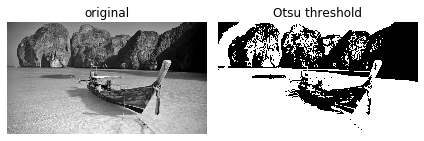

In [13]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('Otsu threshold')
plt.imshow(otsu_mask, cmap='gray')
plt.tight_layout()
plt.show()

# İkili görüntüde dış ve iç konturları bulma

İkili bir görüntüden çıkarılmış konturlara sahip olmak, size alternatif bir görüntü sunumu sağlar ve kontur-spesifik görüntü analizi yöntemlerini uygulamanıza izin verir. 

In [31]:
input_file2 = "BnW.png"
image = cv2.imread(input_file2,0)

In [32]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [33]:
image_external = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_external, contours, i, 
        255, -1)

In [34]:
image_internal = np.zeros(image.shape, image.dtype)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(image_internal, contours, i, 
        255, -1)

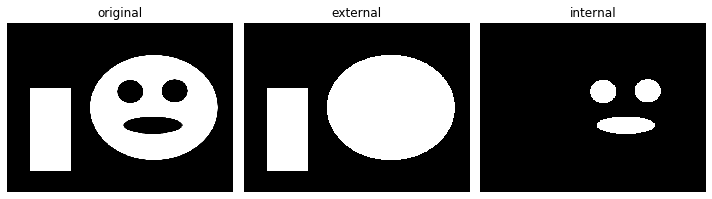

In [35]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('external')
plt.imshow(image_external, cmap='gray')
plt.subplot(133)
plt.axis('off')
plt.title('internal')
plt.imshow(image_internal, cmap='gray')
plt.tight_layout()
plt.show()

In [36]:
print(cv2.__version__.split('.')[0])

4


# K-means algoritması ile görüntü segmentasyonu

Bazen görüntüdeki piksellerin rengi, anlamsal (semantically) olarak yakın alanların nerede olduğunu belirlemeye yardımcı olabilir. Örneğin, yol yüzeyleri, bazı durumlarda, hemen hemen aynı renge sahip olabilir. Renge göre, tüm yol piksellerini bulabiliriz. Ama ya yolun rengini bilmiyorsak? Burada, k-means kümeleme algoritması devreye giriyor. Bu algoritmanın sadece bir görüntüde kaç tane küme olduğunu veya başka bir deyişle görüntünün kaç tane kümeye sahip olmasını istediğimizi bilmesi gerekir. 

In [2]:
image = cv2.imread('./phuketkk.jpg').astype(np.float32) / 255.
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [3]:
data = image_lab.reshape((-1, 3))

In [4]:
num_classes = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)
_, labels, centers = cv2.kmeans(data, num_classes, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [5]:
segmented_lab = centers[labels.flatten()].reshape(image.shape)
segmented = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2RGB)

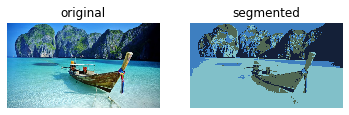

In [6]:
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image[:, :, [2, 1, 0]])
plt.subplot(122)
plt.axis('off')
plt.title('segmented')
plt.imshow(segmented)
plt.show()

# Segment seeds - the watershed algoritması ile görüntü segmentasyonu

Watershed algoritması, başlangıç segmentasyon noktalarımız olduğunda ve çevreleyen alanları aynı segmentasyon sınıfıyla otomatik olarak doldurmak istediğimizde kullanılır.  Bu başlangıç bölütlenmiş noktalara seed (tohum) denir ve bunlar manuel olarak ayarlanmalıdır, ancak bazı durumlarda bunları otomatik olarak atamak mümkündür. 

TO DO: Watershed algoritması ile örnek bir görüntü üzerinde segmentasyon uygulaması gerçekleştiriniz.

# Hough dönüşümünü kullanarak çizgileri ve daireleri algılama

Hough dönüşümü, parametrelenmiş ve uygun bir matematiksel formda gösterilen herhangi bir şeklin tespiti için kullanılan bir tekniktir. Temel olarak, kaynak görüntüdeki her piksel için Hough dönüşümü, gözlemi tatmin eden ve bunları tabloda saklayan bir dizi model parametresi bulur. Her piksel, olası modellerin bir alt kümesine oy verir. Çıktı tespitleri bir oylama prosedürü ile elde edilir.

In [2]:
img = np.zeros((500, 500), np.uint8)
cv2.circle(img, (200, 200), 50, 255, 3)
cv2.line(img, (100, 400), (400, 350), 255, 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, 100, 10)[0]

In [4]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 15, param1=200, param2=30)[0]

In [5]:
dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8) 
for x1, y1, x2, y2 in lines:
    print('Detected line: ({} {}) ({} {})'.format(x1, y1, x2, y2))
    cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2) 

for c in circles:
    print('Detected circle: center=({} {}), radius={}'.format(c[0], c[1], c[2]))
    cv2.circle(dbg_img, (c[0], c[1]), c[2], (0, 255, 0), 2)

Detected line: (99 401) (372 353)
Detected circle: center=(200.5 200.5), radius=52.29999923706055


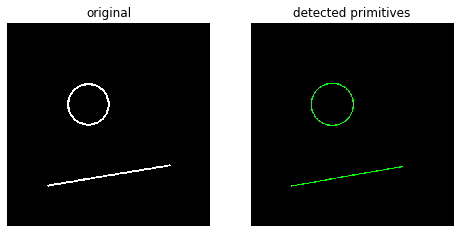

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.title('detected primitives')
plt.axis('off')
plt.imshow(dbg_img)
plt.show()